# SI 330 - Homework #2: Time Series and Visualization

## Background

We are going to return to the environmental sensor data that we introduced earlier in this section of the course.

Your main task in this assignment is to explore the data *using the time series manipulation methods and visualization techniques we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  


A total of 50 points is available in this homework assignment, consisting of:
- 40 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 5 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 5 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
Load the data from https://raw.githubusercontent.com/umsi-data-science/data/main/aranet4.csv into a DataFrame.

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### Q1 (10 points): Create a scatterplot that shows the relationship between relative humidity (as the dependent or y-axis variable) and temperature (as the independent or x-axis variable).
Be sure to label the axes and provide a title for your chart.
Is there anything interesting to report based on your visualization?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
aranet = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/aranet4.csv')
aranet.head(5)

,Time,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
0,1/18/2022 9:46:13 PM,1656,15.0,52,990
1,1/18/2022 9:47:13 PM,1656,15.0,52,990
2,1/18/2022 9:48:13 PM,1656,15.0,52,990
3,1/18/2022 9:49:13 PM,1010,17.9,40,990
4,1/18/2022 9:50:13 PM,956,18.3,39,990


In [8]:
aranet.describe()

,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
count,5773.000000,5773.000000,5773.000000,5773.000000
mean,630.763208,17.754062,24.391478,1000.933830
std,176.136803,1.803766,3.507078,9.760638
min,441.000000,7.300000,15.000000,983.000000
25%,510.000000,16.700000,22.000000,992.000000
50%,611.000000,18.300000,24.000000,1002.000000
75%,684.000000,18.800000,26.000000,1009.000000
max,2263.000000,22.200000,52.000000,1017.000000


<AxesSubplot:title={'center':'Question #1- Brandon Huggard'}, xlabel='Temperature(°C)', ylabel='Relative humidity(%)'>

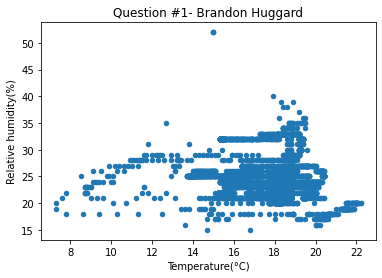

In [11]:
aranet.plot.scatter(title= 'Question #1- Brandon Huggard', x= 'Temperature(°C)', y='Relative humidity(%)')

I created a scatterplot with relative humidity on the y axis and termperature on the x axis, I used the .plot function in pandas setting the x and y to respective series from the dataframe.

### Q2 (10 points): Create a box plot of Atmospheric Pressure.
Use annotation to indicate the median, maximum, and minimum values. (note: you might want to use something like .describe() to get the actual values).

In [21]:
aranet.describe()

,Carbon dioxide(ppm),Temperature(°C),Relative humidity(%),Atmospheric pressure(hPa)
count,5773.000000,5773.000000,5773.000000,5773.000000
mean,630.763208,17.754062,24.391478,1000.933830
std,176.136803,1.803766,3.507078,9.760638
min,441.000000,7.300000,15.000000,983.000000
25%,510.000000,16.700000,22.000000,992.000000
50%,611.000000,18.300000,24.000000,1002.000000
75%,684.000000,18.800000,26.000000,1009.000000
max,2263.000000,22.200000,52.000000,1017.000000


Text(0.6, 983, 'Minimum (983)')

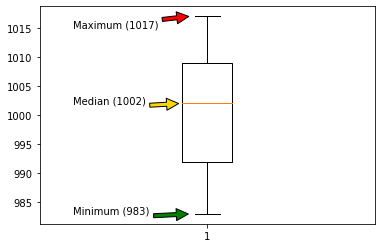

In [57]:
plt.boxplot(aranet['Atmospheric pressure(hPa)'])
plt.annotate('Maximum (1017)', xy=(.95, 1017), xytext=(.6, 1015),
            arrowprops=dict(facecolor='red', shrink=0.05),
            )
plt.annotate('Median (1002)', xy=(.92, 1002), xytext=(.6, 1002),
            arrowprops=dict(facecolor='gold', shrink=0.05),
            )
plt.annotate('Minimum (983)', xy=(.95, 983), xytext=(.6, 983),
            arrowprops=dict(facecolor='green', shrink=0.05),
            )


Using matplotlib I created a boxplot on the series Atmospheric Pressure from the DataFrame given. I used the annotate function to add notes accordingly with different colors because I think it looks nice.

### Q3 (10 points): Create a line chart of the maximum hourly carbon dioxide concentrations for January 20, 2022. 
Note that the values are reported every two minutes; you need to report the hourly maximum values.

<AxesSubplot:title={'center':'Question #3- Brandon Huggard'}, xlabel='Time', ylabel='Carbon Dioxide (PPM)'>

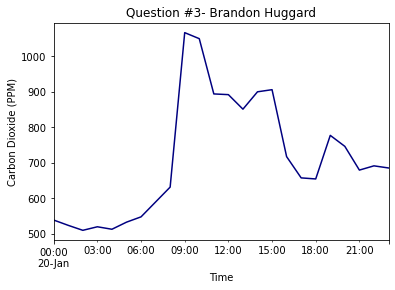

In [90]:
aranet.index = pd.to_datetime(aranet.index)
jan20 = aranet.loc['2022-01-20', :]
jan20["Carbon dioxide(ppm)"].resample("1H").max().plot(title='Question #3- Brandon Huggard', color= 'navy', ylabel= 'Carbon Dioxide (PPM)', xlabel = 'Time')

Setting the time index to a datetime datatype I was able to then locate January 20th as a day and from there resample into an hourly breakdown, find the max value from each sample point, and plot it accordingly with c

### Q4 (10 points): Create a line chart for the values of carbon dioxide for January 21, 2022.  

When coloring your markers and/or lines, use green for values less than 1000, orange for values between 1000 and 1400, and red for values greater than 1400.

In [97]:
jan21= aranet.loc['2022-01-21', :]
jan21.dtypes

Carbon dioxide(ppm)            int64
Temperature(°C)              float64
Relative humidity(%)           int64
Atmospheric pressure(hPa)      int64
dtype: object

<AxesSubplot:title={'center':'Question #4- Brandon Huggard'}, xlabel='Time'>

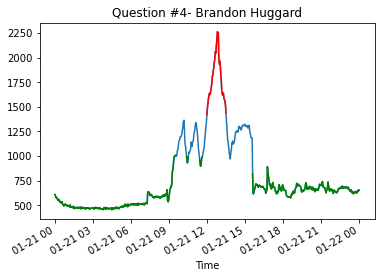

In [153]:
green = jan21["Carbon dioxide(ppm)"].where(jan21["Carbon dioxide(ppm)"] < 1000)
red = jan21["Carbon dioxide(ppm)"].where(jan21["Carbon dioxide(ppm)"] > 1400)

jan21["Carbon dioxide(ppm)"].plot(title= 'Question #4- Brandon Huggard')
green.plot(color= 'green')
red.plot(color= 'red')

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas